<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with abundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Data selected for analysis

Below is a list of datasets I've initially chosen to include in my analysis:

* [Monthly average number of rainy days](../datasets/rainfall-monthly-number-of-rain-days.csv): 
<br> Description: Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [Monthly total rainfall](../datasets/rainfall-monthly-total.csv): 
<br> Description: Monthly total rain recorded in mm(millimeters) from 1982 to 2022.
* [Relative Humidity](../datasets/relative-humidity-monthly-mean.csv):
<br> Description: Monthly average of relative humidity from 1982 to 2022.
* [Hourly wet bulb temperature](../datasets/wet-bulb-temperature-hourly.csv)
<br> Description: Hourly wet bulb temperature from 1982 to 2022.
* [Monthly mean sunshine hours](../datasets/sunshine-duration-monthly-mean-daily-duration.csv)
<br> Description: Monthly average hours of sunshine over a day
* [Surface Air Temperature](../datasets/surface-air-temperature-monthly-mean.csv)
<br> Description: Daily average minimum temperature 
* [Average monthly household electricity consumption by planning area and dwelling type](../energy%20data/SES_Public_2023_tidy.xlsx.coredownload.xlsx)
<br> Description: Monthly household electricity consumption by dwelling type (e.g. 1-room, 3-room, landed etc.)



## Problem Statement

Global warming has been the cause of increasingly prolonged heat waves in Singapore over the months of April and May, and intensified rainfall extremes over the monsoon months. [(NEA, 2024)](https://www.nea.gov.sg/media/news/news/index/latest-climate-projections-for-singapore-show-intensifying-urban-heat-and-more-wet-dry-extremes.)

Concerns have been raised during parliament [(MTI, 2023)](https://www.mti.gov.sg/Newsroom/Parliamentary-Replies/2023/07/Written-reply-to-to-PQs-on-electricity-demand-and-grid-stress-from-prolonged-heat-wave) on electricity demand and grid stress during these extreme weather conditions in Singapore. While it has been temporarily resolved that our peak capacity is still higher than the peak national demand, there are still expectations on EMA to ensure that we are efficient in catering for local electricity demands, especially during extreme weather periods in the future.

Essentially, how can EMA’s energy supply be better prepared for the increased electricity demand and grid stress from climate fluctuations?

The aim is to provide EMA (Energy Market Authority) with insights in management of electricity generation and distribution based on climate fluctuations.

### Outside Research

While parliamentary discussions have highlighted that "electricity consumption is likely to be higher during the hotter months of April and May" [(NEA, 2024)](https://www.nea.gov.sg/media/news/news/index/latest-climate-projections-for-singapore-show-intensifying-urban-heat-and-more-wet-dry-extremes), it is also important to look into how climate affects other regions to glean some initial learnings and draw hypotheses.

1. The US EPA (Environmental Protection Agency) has highlighted that as the climate warms, "Americans are expected to use more energy, mostly electricity, for cooling" [(USEPA, 2023)](https://www.epa.gov/climateimpacts/climate-change-impacts-energy).

2. While a study in China has shown a growing trend of increasing temperatures leading to higher demand for residential electricity. [(Hou, Liu, Dong, 2022)](https://link.springer.com/article/10.1007/s11356-022-21813-7)

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def mean(x):
    return sum(x)/len(x)

my_list=[5,8,3,9,321,54]
mean(my_list)

66.66666666666667

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def sd_calc(values):
    values_to_sum=[]
    for value in values:
        dist_to_mean = (value-mean(values))**2
        values_to_sum.append(dist_to_mean)
    return (sum(values_to_sum)/len(values))**0.5

sd_calc(my_list)

115.08644094283605

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
rf_total = pd.read_csv('../datasets/rainfall-monthly-total.csv')
rf_days = pd.read_csv('../datasets/rainfall-monthly-number-of-rain-days.csv')
humidity = pd.read_csv('../datasets/relative-humidity-monthly-mean.csv')
sunshine = pd.read_csv('../datasets/sunshine-duration-monthly-mean-daily-duration.csv')
temp = pd.read_csv('../datasets/surface-air-temperature-monthly-mean.csv')
wbt = pd.read_csv('../datasets/wet-bulb-temperature-hourly.csv')

##### Cleaning total rainfall data

In [6]:
rf_total.head(5) # Printing the first 5 rows of the dataframe

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [7]:
rf_total.describe() # Understanding the data with statistics

,total_rainfall
count,488.000000
mean,177.163730
std,113.916029
min,0.200000
25%,93.850000
50%,159.450000
75%,238.075000
max,765.900000


In [8]:
rf_total.isnull().value_counts() # Checking for null values

month  total_rainfall
False  False             488
Name: count, dtype: int64

##### Cleaning number of rain days per month data

In [9]:
rf_days.head(5) # Printing the first 5 rows of the dataframe

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [10]:
rf_days.describe() # Understanding the data with statistics

,no_of_rainy_days
count,488.000000
mean,14.061475
std,4.947394
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


In [11]:
rf_days.isnull().value_counts() # Checking for null values

month  no_of_rainy_days
False  False               488
Name: count, dtype: int64

##### Cleaning average monthly humidity data

In [12]:
humidity.head(5) # Printing the first 5 rows of the dataframe

,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


In [13]:
humidity.describe() # Understanding the data with statistics

,mean_rh
count,491.000000
mean,82.224644
std,3.417366
min,72.000000
25%,79.900000
50%,82.600000
75%,84.650000
max,90.700000


In [14]:
humidity.isnull().value_counts() # Checking for null values

month  mean_rh
False  False      491
Name: count, dtype: int64

##### Cleaning sunshine data

In [15]:
sunshine.head(5) # Printing the first 5 rows of the dataframe

,month,mean_sunshine_hrs
0,1982-01,5.6
1,1982-02,7.6
2,1982-03,5.1
3,1982-04,4.7
4,1982-05,5.8


In [16]:
sunshine.describe() # Understanding the data with statistics

,mean_sunshine_hrs
count,491.000000
mean,5.676171
std,1.212024
min,2.700000
25%,4.800000
50%,5.600000
75%,6.450000
max,9.300000


In [17]:
sunshine.isnull().value_counts() # Checking for null values

month  mean_sunshine_hrs
False  False                491
Name: count, dtype: int64

##### Cleaning average monthly temperature data

In [18]:
temp.head(5) # Printing the first 5 rows of the dataframe

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [19]:
temp.describe() # Understanding the data with statistics

,mean_temp
count,491.000000
mean,27.678615
std,0.799905
min,25.400000
25%,27.100000
50%,27.700000
75%,28.300000
max,29.500000


In [20]:
temp.isnull().value_counts() # Checking for null values

month  mean_temp
False  False        491
Name: count, dtype: int64

##### Cleaning wet bulb temperature data

In [21]:
wbt.head(10) # Printing the first 5 rows of the dataframe

,wbt_date,wbt_time,wet_bulb_temperature
0,1982-01-01,1,24.7
1,1982-01-01,2,24.5
2,1982-01-01,3,24.3
3,1982-01-01,4,24.2
4,1982-01-01,5,24.2
5,1982-01-01,6,23.0
6,1982-01-01,7,23.4
7,1982-01-01,8,23.0
8,1982-01-01,9,23.9
9,1982-01-01,10,24.1


In [22]:
wbt.describe() # Understanding the data with statistics

,wbt_time,wet_bulb_temperature
count,358656.000000,358656.000000
mean,12.499933,25.257366
std,6.922201,1.022259
min,0.000000,15.300000
25%,6.000000,24.600000
50%,12.000000,25.300000
75%,18.000000,26.000000
max,24.000000,29.300000


In [23]:
wbt.isnull().value_counts() # Checking for null values

wbt_date  wbt_time  wet_bulb_temperature
False     False     False                   358656
Name: count, dtype: int64

In [24]:
wbt['wbt_date'] = pd.to_datetime(wbt['wbt_date']) #converting wbt_date to date time format for easy handling
wbt['month']=wbt['wbt_date'].dt.strftime('%Y-%m')
wbt = wbt.groupby('month')['wet_bulb_temperature'].mean().reset_index()
wbt

,month,wet_bulb_temperature
0,1982-01,23.456048
1,1982-02,24.297619
2,1982-03,24.811559
3,1982-04,25.103750
4,1982-05,25.689651
...,...,...
486,2022-07,25.439113
487,2022-08,25.072312
488,2022-09,24.833889
489,2022-10,24.688575


In [25]:
climate_df = pd.merge(rf_total, rf_days, on="month") # Merging total rainfall with number of rainy days to create a climate dataframe
climate_df = pd.merge(climate_df, humidity, on="month") # Merging humidity with climate dataframe
climate_df = pd.merge(climate_df, sunshine, on="month") # Merging sunshine with climate dataframe
climate_df = pd.merge(climate_df, temp, on="month") # Merging temperature with climate dataframe
climate_df = pd.merge(climate_df, wbt, on="month") # Merging wet bulb temperature with climate dataframe
climate_df.head()


,month,total_rainfall,no_of_rainy_days,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature
0,1982-01,107.1,10,81.2,5.6,25.9,23.456048
1,1982-02,27.8,5,79.5,7.6,27.1,24.297619
2,1982-03,160.8,11,82.3,5.1,27.2,24.811559
3,1982-04,157.0,14,85.9,4.7,27.0,25.103750
4,1982-05,102.2,10,83.2,5.8,28.0,25.689651


##### Importing and cleaning electricity consumption by household (monthly) 

In [26]:
consumption = pd.read_excel('../energy data/SES_Public_2023_tidy.xlsx.coredownload.xlsx', sheet_name="T3.5")
consumption.head()

,dwelling_type,year,month,Region,Description,kwh_per_acc
0,1-room / 2-room,2005.0,1,Central Region,Bishan,104.9
1,1-room / 2-room,2005.0,1,Central Region,Bukit Merah,140.7
2,1-room / 2-room,2005.0,1,Central Region,Central Region,136.5
3,1-room / 2-room,2005.0,1,Central Region,Geylang,148.5
4,1-room / 2-room,2005.0,1,Central Region,Kallang,115.6


In [27]:
consumption.info()
# year is float datatype, while consumption measurement (kwh_per_acc) is an object, there are also 3 null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70706 entries, 0 to 70705
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dwelling_type  70704 non-null  object 
 1   year           70703 non-null  float64
 2   month          70703 non-null  object 
 3   Region         70703 non-null  object 
 4   Description    70703 non-null  object 
 5   kwh_per_acc    70703 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.2+ MB


In [28]:
consumption = consumption[:-3] # Null values were at the bottom 3 rows
consumption.tail() # Checking that the bottom 3 rows have no more null values
consumption.info() # Checking again that all columns have the same number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70703 entries, 0 to 70702
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dwelling_type  70703 non-null  object 
 1   year           70703 non-null  float64
 2   month          70703 non-null  object 
 3   Region         70703 non-null  object 
 4   Description    70703 non-null  object 
 5   kwh_per_acc    70703 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.2+ MB


In [29]:
# The dataframe has a "region" column whereby consumption is split by certain regions, and an overall attribute, not analysing overall regional usage
overall_consumption = consumption[consumption['Region']=='Overall'] 
# Converting the year column into string
overall_consumption['year'] = overall_consumption['year'].astype(int)
overall_consumption['year'] = overall_consumption['year'].astype(str)
# Converting the electricity usage column into float
overall_consumption['kwh_per_acc'] = overall_consumption['kwh_per_acc'].astype(float)
# Concatenating a '0' to the month column where length of str is 1
overall_consumption['month'] = overall_consumption['month'].astype(str)
overall_consumption['month'] = overall_consumption['month'].apply(lambda x: x if len(x) == 2 else '0'+x)
overall_consumption.month.unique() # Realised that there are values in the month variable called "Annual"
overall_consumption = overall_consumption[overall_consumption['month'] != '0Annual']
overall_consumption['year_month']=overall_consumption['year'] + '-' + overall_consumption['month']
overall_consumption.head()

/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_7599/377965838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_consumption['year'] = overall_consumption['year'].astype(int)
/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_7599/377965838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_consumption['year'] = overall_consumption['year'].astype(str)
/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_7599/377965838.py:7: SettingWithCopyWarning: 
A value is tryi

,dwelling_type,year,month,Region,Description,kwh_per_acc,year_month
22,1-room / 2-room,2005,01,Overall,Overall,135.2,2005-01
51,1-room / 2-room,2005,02,Overall,Overall,129.0,2005-02
80,1-room / 2-room,2005,03,Overall,Overall,131.5,2005-03
109,1-room / 2-room,2005,04,Overall,Overall,148.0,2005-04
138,1-room / 2-room,2005,05,Overall,Overall,147.0,2005-05


##### Joining climate dataframe to the housing electricity consumption dataframe

In [30]:
# Left join the climate dataframe to consumption
df = overall_consumption.merge(climate_df, how='outer', left_on='year_month', right_on='month')
# Drop null values where year and total rainfall is null
df.dropna(subset=['year'], inplace=True)
df.dropna(subset=['total_rainfall'], inplace=True)
# Rename month_x column and drop the duplicated month_y column
df.rename(columns={'month_x':'month'}, inplace=True)
df.drop(columns=['month_y'], inplace=True)
df.drop(columns=['Region', 'Description'], inplace=True)
# Renaming the consumption column to make it more readable
df.rename(columns={'kwh_per_acc':'consumption_kwh'}, inplace=True)
# Rearranging the columns, remove overall dwelling type data as I'll be able to aggregate it later if needed
df = df[['dwelling_type', 'year', 'month', 'year_month', 'consumption_kwh', 'total_rainfall', 'no_of_rainy_days', 'mean_rh', 'mean_sunshine_hrs', 'mean_temp', 'wet_bulb_temperature']]
df.drop(df[df['dwelling_type']=='Overall'].index, inplace=True)
df

,dwelling_type,year,month,year_month,consumption_kwh,total_rainfall,no_of_rainy_days,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature
0,1-room / 2-room,2005,01,2005-01,135.2,163.2,8.0,83.3,6.5,26.6,24.395968
1,Landed Properties,2005,01,2005-01,1037.7,163.2,8.0,83.3,6.5,26.6,24.395968
3,Private Apartments and Condominiums,2005,01,2005-01,624.8,163.2,8.0,83.3,6.5,26.6,24.395968
4,Private Housing,2005,01,2005-01,751.4,163.2,8.0,83.3,6.5,26.6,24.395968
5,Public Housing,2005,01,2005-01,330.9,163.2,8.0,83.3,6.5,26.6,24.395968
...,...,...,...,...,...,...,...,...,...,...,...
1452,5-room and Executive,2022,08,2022-08,468.3,141.4,15.0,77.4,5.5,28.1,25.072312
1453,Landed Properties,2022,08,2022-08,1215.7,141.4,15.0,77.4,5.5,28.1,25.072312
1455,Private Apartments and Condominiums,2022,08,2022-08,540.2,141.4,15.0,77.4,5.5,28.1,25.072312
1456,Private Housing,2022,08,2022-08,659.2,141.4,15.0,77.4,5.5,28.1,25.072312


In [31]:
df['year_month'].nunique() # I have 212 unique year-month values
df['dwelling_type'].nunique() # There are 8 unique dwelling types
df_1room=df[df['dwelling_type']=='1-room / 2-room']
df_1room # 1/2 room flats have data from 2005-01 to 2022-08
df_3room=df[df['dwelling_type']=='3-room']
df_3room.head() # 3 room flats have data from 2018-01 to 2022-08

,dwelling_type,year,month,year_month,consumption_kwh,total_rainfall,no_of_rainy_days,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature
955,3-room,2018,01,2018-01,248.7,287.0,25.0,86.6,4.1,26.1,24.345430
964,3-room,2018,02,2018-02,232.9,14.8,5.0,77.2,8.0,27.2,24.058631
973,3-room,2018,03,2018-03,232.9,44.6,10.0,78.4,6.4,28.0,24.965323
982,3-room,2018,04,2018-04,264.4,61.2,14.0,78.5,6.8,28.5,25.470000
991,3-room,2018,05,2018-05,275.9,132.2,19.0,79.0,5.8,28.7,25.722446


Continued this date range analysis across all dwelling types: 
* 4 room: 2018-01 to 2022-08
* 5 room: 2016-04 to 2022-08
* Private Apartments and Condos: 2005-01 to 2022-08
* Landed Properties: 2005-01 to 2022-08
* Private Housing: 2005-01 to 2022-08
* Public Housing: 2005-01 to 2022-08

<br>Since there are missing values from 3 room, 4 room and 5 room consumption before 2018, I have decided to restrict my analysis date range to 2018-01 to 2022-08 (56 months)


In [32]:
years_to_keep = ['2018', '2019', '2020', '2021', '2022']
df_fin = df[df['year'].isin(years_to_keep)]
df_fin['year_month'].nunique() # Final: I have 56 unique year-month values

56

To make ease of comparison between dwelling types easier, I've decided to create separate columns for each dwelling type's consumption


In [33]:
df_1room=df_fin[df_fin['dwelling_type']=='1-room / 2-room']
df_1room=df_1room.rename(columns={'consumption_kwh':'1rm_cons'})
df_main = df_1room.drop(columns='dwelling_type') # using df_1room as the main dataframe to be merged with other dwelling type consumptions
# merging and rename to 3rm consumption
df_3room=df_fin[df_fin['dwelling_type']=='3-room']
df_3room = df_3room.drop(columns='dwelling_type')
df_main = pd.merge(df_main, df_3room, how='left')
df_main = df_main.rename(columns={'consumption_kwh':'3rm_cons'}) 
 # merging 4rm consumption
df_4room=df_fin[df_fin['dwelling_type']=='4-room']
df_4room = df_4room.rename(columns={'consumption_kwh':'4rm_cons'})
df_4room=df_4room.drop(columns='dwelling_type')
df_main = pd.merge(df_main, df_4room, how='left')
# merging 5rm consumption
df_5room=df_fin[df_fin['dwelling_type']=='5-room and Executive']
df_5room = df_5room.rename(columns={'consumption_kwh':'5rm_cons'})
df_5room=df_5room.drop(columns='dwelling_type')
df_main = pd.merge(df_main, df_5room, how='left') 
 # merging condo consumption
df_pa_condo=df_fin[df_fin['dwelling_type']=='Private Apartments and Condominiums']
df_pa_condo = df_pa_condo.rename(columns={'consumption_kwh':'condo_cons'})
df_pa_condo=df_pa_condo.drop(columns='dwelling_type')
df_main = pd.merge(df_main, df_pa_condo, how='left')
 # merging landed consumption
df_landed=df_fin[df_fin['dwelling_type']=='Landed Properties']
df_landed = df_landed.rename(columns={'consumption_kwh':'landed_cons'})
df_landed=df_landed.drop(columns='dwelling_type')
df_main = pd.merge(df_main, df_landed, how='left')
 # merging public housing consumption
df_public=df_fin[df_fin['dwelling_type']=='Public Housing']
df_public = df_public.rename(columns={'consumption_kwh':'public_cons'})
df_public=df_public.drop(columns='dwelling_type')
df_main = pd.merge(df_main, df_public, how='left')
 # merging public housing consumption
df_private=df_fin[df_fin['dwelling_type']=='Private Housing']
df_private = df_private.rename(columns={'consumption_kwh':'private_cons'})
df_private=df_private.drop(columns='dwelling_type')
df_main = pd.merge(df_main, df_private, how='left')
 # rearranging the columns
df_main = df_main[['year', 'month', 'year_month', 'total_rainfall', 'no_of_rainy_days', 'mean_rh', 'mean_sunshine_hrs', 'mean_temp', 'wet_bulb_temperature', '1rm_cons', '3rm_cons', '5rm_cons', 'condo_cons', 'landed_cons', 'public_cons', 'private_cons' ]]
df_agg = df_main.drop(columns = ['1rm_cons', '3rm_cons', '5rm_cons', 'condo_cons', 'landed_cons']) 
# saving the main dataframe into a csv
df_main.to_csv('climate_electricity_consumption.csv', index=False)
df_main.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  56 non-null     object 
 1   month                 56 non-null     object 
 2   year_month            56 non-null     object 
 3   total_rainfall        56 non-null     float64
 4   no_of_rainy_days      56 non-null     float64
 5   mean_rh               56 non-null     float64
 6   mean_sunshine_hrs     56 non-null     float64
 7   mean_temp             56 non-null     float64
 8   wet_bulb_temperature  56 non-null     float64
 9   1rm_cons              56 non-null     float64
 10  3rm_cons              56 non-null     float64
 11  5rm_cons              56 non-null     float64
 12  condo_cons            56 non-null     float64
 13  landed_cons           56 non-null     float64
 14  public_cons           56 non-null     float64
 15  private_cons          56 

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year_month**|*object*|Climate data|Date values in 'yyyy-mm' format, from 2018 January (2018-01) to 2022 August (2022-08)| 
|**total_rainfall**|*float*|Climate data|The volume of rainfall (measured in mm) over 2018 to 2022 August|
|**no_of_rainy_days**|*float*|Climate data|The total number of rainy days measured monthly over 2018 to 2022 August. (A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.)|
|**mean_rh**|*float*|Climate data|Monthly average relative humidity, expressed in percentages, is a ratio of the amount of atmospheric moisture present relative to the amount that would be present if the air were saturated.|
|**mean_sunshine_hrs**|*float*|Climate data|Measured with a pyrheliometer comprising of a glass globe and recorder card. The number of hours of sunshine each day is derived from the time taken between the first and last burnt marks on the card.|
|**mean_temp**|*float*|Climate data|Average monthly temperature, measured with a thermometer in degrees celsius by Singapore's weather stations|
|**wet_bulb_temperature**|*float*|Climate data|Average monthly wet bulb temperature. A composite measure that takes into account air temperature, humidity, wind and solar radiation, and it is different from air temperature.|
|**1rm_cons**|*float*|Singapore Energy Statistics|Average monthly electricity consumption of 1 room and 2 room flats in Singapore. Measured in kWh.|
|**3rm_cons**|*float*|Singapore Energy Statistics|Average monthly electricity consumption of 3 room and 4 room flats in Singapore. Measured in kWh.|
|**5rm_cons**|*float*|Singapore Energy Statistics|Average monthly electricity consumption of 5 room and Executive flats in Singapore. Measured in kWh.|
|**condo_cons**|*float*|Singapore Energy Statistics|Average monthly electricity consumption of Condominiums and Private Apartments in Singapore. Measured in kWh.|
|**landed_cons**|*float*|Singapore Energy Statistics|Average monthly electricity consumption of Private landed properties in Singapore. Measured in kWh.|
|**public_cons**|*float*|Singapore Energy Statistics|Average monthly electricity consumption of all public housing (HDB flats) in Singapore. Measured in kWh.|
|**private_cons**|*float*|Singapore Energy Statistics|Average monthly electricity consumption of all private housing (Condominiums, private apartments and landed properties) in Singapore. Measured in kWh.|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.

In [34]:
df_main.describe()


,total_rainfall,no_of_rainy_days,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,1rm_cons,3rm_cons,5rm_cons,condo_cons,landed_cons,public_cons,private_cons
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,161.605357,14.142857,78.216071,6.130357,28.069643,25.078139,168.842857,274.419643,455.328571,539.396429,1194.300000,359.528571,658.744643
std,112.780702,5.590344,2.756003,1.267054,0.695157,0.508530,15.753047,25.012320,47.119985,60.607485,95.095468,34.951992,65.528919
min,1.000000,2.000000,72.100000,3.800000,26.000000,23.733333,140.900000,232.900000,380.800000,435.400000,1017.500000,303.700000,545.000000
25%,92.150000,10.000000,76.750000,5.200000,27.675000,24.732951,158.025000,257.300000,425.900000,508.775000,1129.175000,338.750000,622.350000
50%,147.700000,14.000000,78.150000,6.150000,28.100000,25.112894,166.950000,274.550000,454.900000,539.350000,1182.550000,359.750000,656.150000
75%,207.000000,18.000000,79.550000,6.850000,28.525000,25.439439,178.025000,283.575000,469.600000,554.900000,1241.650000,371.050000,678.475000
max,692.800000,27.000000,86.600000,9.200000,29.300000,26.341935,215.600000,360.300000,628.600000,765.700000,1502.700000,486.000000,892.600000


2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`

In [35]:
column_values = df_main[df_main.columns[4:]]
column_values
sd = {col: sd_calc(df_main[col]) for col in column_values}
sd

{'no_of_rainy_days': 5.540205551332947,
 'mean_rh': 2.7312854630397476,
 'mean_sunshine_hrs': 1.2556898563363976,
 'mean_temp': 0.688922461648091,
 'wet_bulb_temperature': 0.5039691210481242,
 '1rm_cons': 15.61176133037956,
 '3rm_cons': 24.78798974476822,
 '5rm_cons': 46.69737570741191,
 'condo_cons': 60.06390930942318,
 'landed_cons': 94.24257644125458,
 'public_cons': 34.63851445534969,
 'private_cons': 64.94120395635593}

3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?

In [36]:
rf_total
rf_total_1990=rf_total[rf_total['month'].str.contains('1990')]
rf_total_1990.sort_values('total_rainfall')


,month,total_rainfall
97,1990-02,24.1
99,1990-04,52.4
105,1990-10,56.4
98,1990-03,94.2
101,1990-06,112.6
102,1990-07,124.0
103,1990-08,146.6
96,1990-01,147.4
100,1990-05,180.1
106,1990-11,180.4


In 1990, highest rainfall month is September and lowest rainfall month is February.

In [37]:
rf_total_2000=rf_total[rf_total['month'].str.contains('2000')]
rf_total_2000.sort_values('total_rainfall')

,month,total_rainfall
224,2000-09,81.1
220,2000-05,96.8
223,2000-08,113.5
222,2000-07,116.1
225,2000-10,120.9
221,2000-06,157.5
227,2000-12,236.0
217,2000-02,237.8
218,2000-03,238.3
216,2000-01,275.2


In 2000, highest rainfall month is November and lowest rainfall month is September.

In [38]:
rf_total_2010=rf_total[rf_total['month'].str.contains('2010')]
rf_total_2010.sort_values('total_rainfall')

,month,total_rainfall
337,2010-02,6.3
336,2010-01,69.5
344,2010-09,121.5
340,2010-05,157.5
343,2010-08,158.4
339,2010-04,158.5
345,2010-10,166.2
347,2010-12,181.4
338,2010-03,238.0
341,2010-06,240.5


In 2010, highest rainfall month is July and lowest rainfall month is February.

In [39]:
rf_total_2020=rf_total[rf_total['month'].str.contains('2020')]
rf_total_2020.sort_values('total_rainfall')

,month,total_rainfall
457,2020-02,65.0
465,2020-10,78.8
456,2020-01,88.4
463,2020-08,103.4
458,2020-03,108.8
462,2020-07,140.8
464,2020-09,150.2
459,2020-04,188.0
466,2020-11,220.6
461,2020-06,233.8


In 2020, highest rainfall month is May and lowest rainfall month is February.

        - Which year have the highest and lowest total rainfall in the date range of analysis?

In [40]:
df_by_year = df_main.groupby('year').sum('total_rainfall')
df_by_year.sort_values('total_rainfall')


,total_rainfall,no_of_rainy_days,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,1rm_cons,3rm_cons,5rm_cons,condo_cons,landed_cons,public_cons,private_cons
year,,,,,,,,,,,,,
2022,1278.0,124.0,626.7,48.9,224.7,201.170205,1409.2,2198.9,3688.8,4323.7,9596.3,2899.4,5259.7
2019,1367.5,120.0,919.8,81.4,341.1,302.045393,1933.4,3196.0,5235.1,6257.2,13775.2,4156.2,7650.8
2018,1708.2,188.0,955.2,69.0,334.7,300.872323,1903.8,3143.1,5161.5,6100.4,13678.5,4102.4,7511.6
2020,1886.6,178.0,937.0,70.5,336.5,300.556617,2071.8,3436.9,5734.7,6827.3,15085.3,4510.4,8328.4
2021,2809.6,182.0,941.4,73.5,334.9,299.731234,2137.0,3392.6,5678.3,6697.6,14745.5,4465.2,8139.2


The year with the highest rainfall is 2021 while lowest rainfall was 2022. Note that within this range of analysis, rainfall data is only recorded till 2022 August, if 2022 is omitted due to lack of complete year data, 2019 is the year that has the lowest rainfall.

        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?

In [41]:
rf_days_1990 = rf_days[rf_days['month'].str.contains('1990')]
rf_days_1990.sort_values('no_of_rainy_days')

,month,no_of_rainy_days
98,1990-03,4
97,1990-02,8
101,1990-06,9
99,1990-04,10
100,1990-05,11
102,1990-07,12
105,1990-10,12
96,1990-01,13
103,1990-08,13
107,1990-12,16


In 1990, March had the least number of rainy days (4) while September and November had the most number of rainy days (17)

In [42]:
rf_days_2000 = rf_days[rf_days['month'].str.contains('2000')]
rf_days_2000.sort_values('no_of_rainy_days')

,month,no_of_rainy_days
220,2000-05,10
222,2000-07,12
224,2000-09,12
216,2000-01,14
225,2000-10,14
218,2000-03,15
221,2000-06,16
217,2000-02,18
223,2000-08,18
227,2000-12,18


In 2000, May had the least number of rainy days (10) while November had the most number of rainy days (21)

In [43]:
rf_days_2010 = rf_days[rf_days['month'].str.contains('2010')]
rf_days_2010.sort_values('no_of_rainy_days')

,month,no_of_rainy_days
337,2010-02,4
336,2010-01,10
338,2010-03,11
344,2010-09,13
347,2010-12,14
343,2010-08,16
340,2010-05,17
345,2010-10,17
339,2010-04,18
342,2010-07,18


In 2010, February had the least number of rainy days (4) while November had the most number of rainy days (21)

In [44]:
rf_days_2020 = rf_days[rf_days['month'].str.contains('2020')]
rf_days_2020.sort_values('no_of_rainy_days')

,month,no_of_rainy_days
456,2020-01,6
457,2020-02,8
458,2020-03,8
459,2020-04,12
463,2020-08,12
460,2020-05,16
465,2020-10,16
464,2020-09,18
466,2020-11,19
467,2020-12,20


In 2020, January had the least number of rainy days (6) while July had the most number of rainy days (22)

        - Which year have the highest and lowest number of rainy days in the date range of analysis?

In [45]:
df_by_year.sort_values('no_of_rainy_days')


,total_rainfall,no_of_rainy_days,mean_rh,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,1rm_cons,3rm_cons,5rm_cons,condo_cons,landed_cons,public_cons,private_cons
year,,,,,,,,,,,,,
2019,1367.5,120.0,919.8,81.4,341.1,302.045393,1933.4,3196.0,5235.1,6257.2,13775.2,4156.2,7650.8
2022,1278.0,124.0,626.7,48.9,224.7,201.170205,1409.2,2198.9,3688.8,4323.7,9596.3,2899.4,5259.7
2020,1886.6,178.0,937.0,70.5,336.5,300.556617,2071.8,3436.9,5734.7,6827.3,15085.3,4510.4,8328.4
2021,2809.6,182.0,941.4,73.5,334.9,299.731234,2137.0,3392.6,5678.3,6697.6,14745.5,4465.2,8139.2
2018,1708.2,188.0,955.2,69.0,334.7,300.872323,1903.8,3143.1,5161.5,6100.4,13678.5,4102.4,7511.6


2019 had the least number of rainy days (120 days) while 2018 had the most number of rainy days (188 days)

        - Are there any outliers months in the dataset?

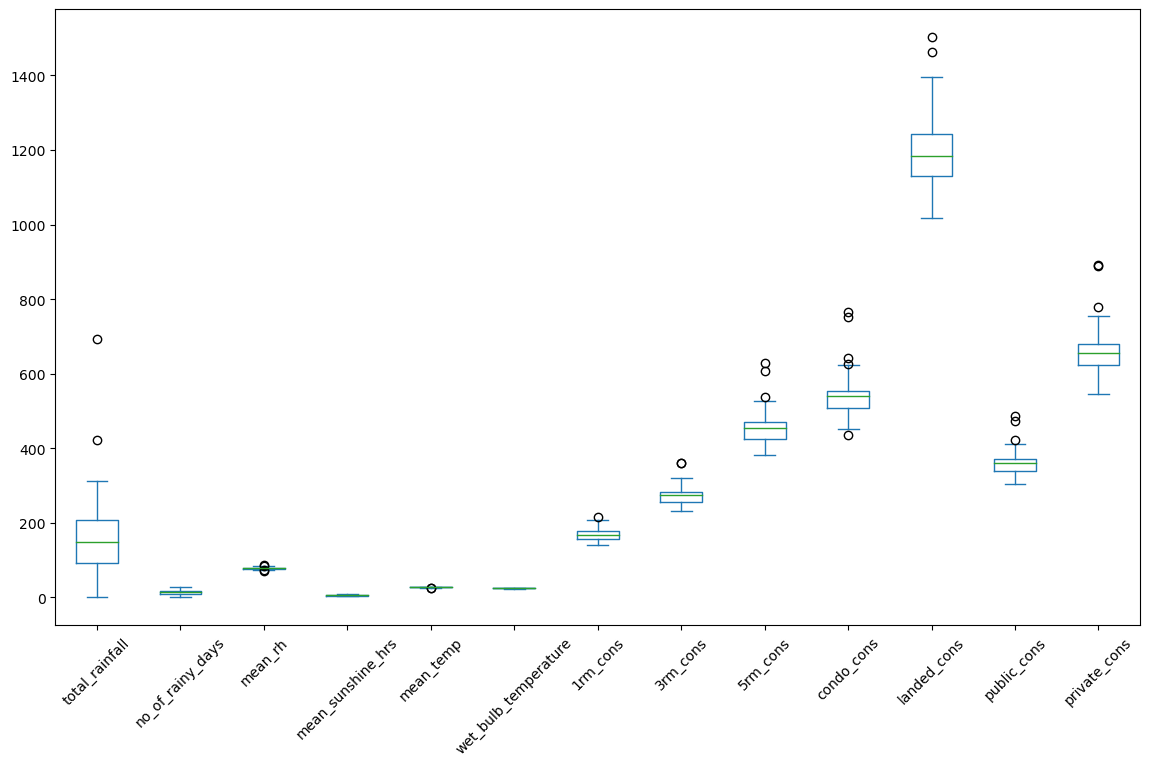

In [46]:
df_numeric = df_main.drop(columns = ['year', 'month', 'year_month'])
df_numeric.plot(kind='box', figsize=(14,8), rot=45)
plt.show()

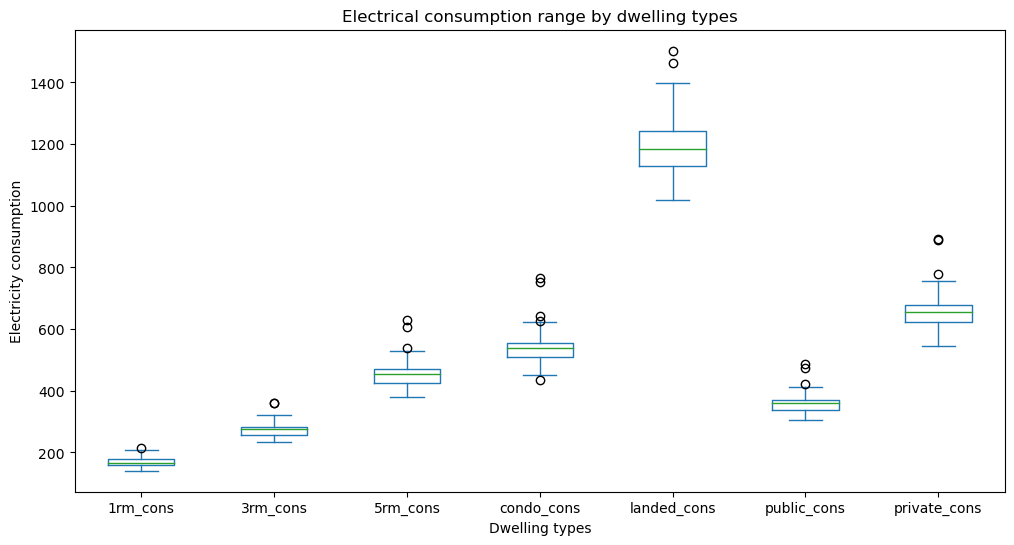

In [47]:
df_numeric.head()
df_housing=df_numeric.drop(columns=['total_rainfall','no_of_rainy_days','mean_rh','mean_sunshine_hrs','mean_temp', 'wet_bulb_temperature'])

# Plot the boxplot
df_housing.plot(kind='box', figsize=(12, 6), xlabel='Dwelling types', ylabel='Electricity consumption', title='Electrical consumption range by dwelling types')

# Show the plot
plt.show()

## Visualizing the Data

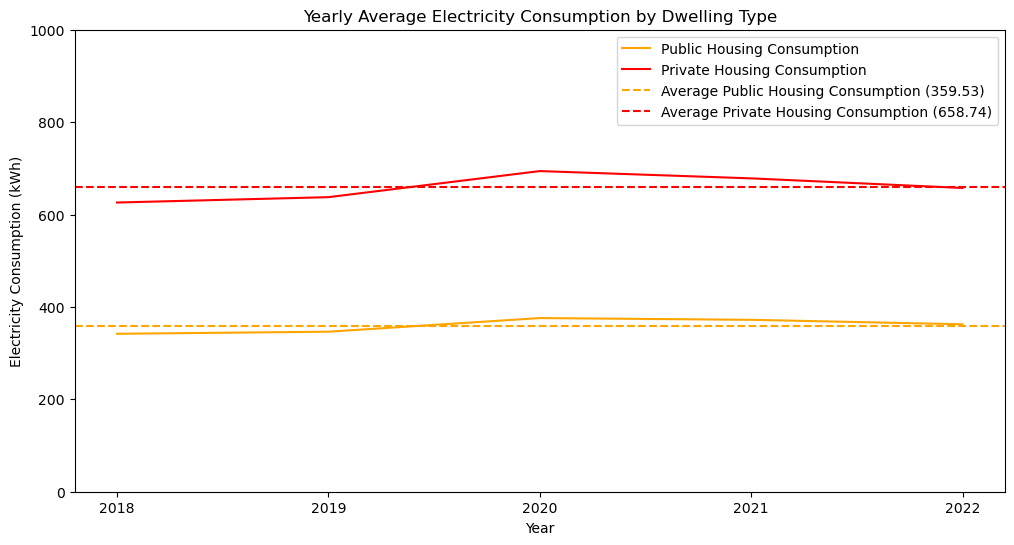

In [75]:
# Is there an annual trend in electricity consumption over the period of analysis

# Grouping by year and calculating the mean of 'public_cons' and 'private_cons'
df_mean = df_agg.groupby('year')[['public_cons', 'private_cons']].mean()

# Plotting the mean values
plt.figure(figsize=(12,6))
plt.plot(df_mean.index, df_mean['public_cons'], label='Public Housing Consumption', color='orange')
plt.plot(df_mean.index, df_mean['private_cons'], label='Private Housing Consumption', color='r')

# Calculating overall mean values
overall_mean_public = df_agg['public_cons'].mean()
overall_mean_private = df_agg['private_cons'].mean()

# Adding horizontal dotted lines for mean values
plt.axhline(y=overall_mean_public, color='orange', linestyle='--', label=f'Average Public Housing Consumption ({overall_mean_public:.2f})')
plt.axhline(y=overall_mean_private, color='r', linestyle='--', label=f'Average Private Housing Consumption ({overall_mean_private:.2f})')

# Setting the y-axis limit to 0-1000
plt.ylim(0, 1000)

# Setting title and axis labels
plt.ylabel('Electricity Consumption (kWh)')
plt.xlabel('Year')
plt.title('Yearly Average Electricity Consumption by Dwelling Type')

# Adding legend
plt.legend()

# Display the plot
plt.show()

**Interpretation**: Average private housing electricity consumption is almost double that of public housing. Electricity consumption has also seen to gently decrease after the covid pandemic.

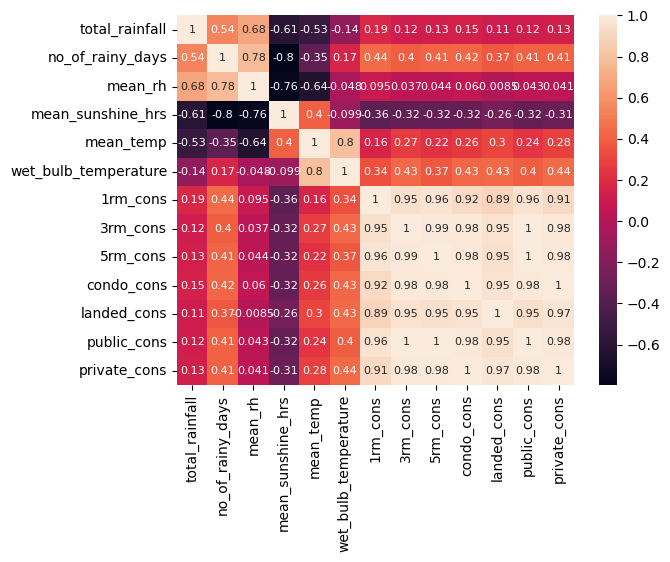

In [49]:
# Generating a heatmap first in order to identify correlations between variables

df_correlations = df_numeric.corr();
sns.heatmap(df_correlations, annot=True, annot_kws={"size":8});

Wet bulb Temperature, Temperature, Sunshine and Rain days per month have stronger correlations (positive and negative) than humidity and total rainfall.
<br> In the next few steps, I'll look into a deep dive on these 4 variables against consumption to identify trends.

### Plot: Wet bulb temperature and Electricity consumption

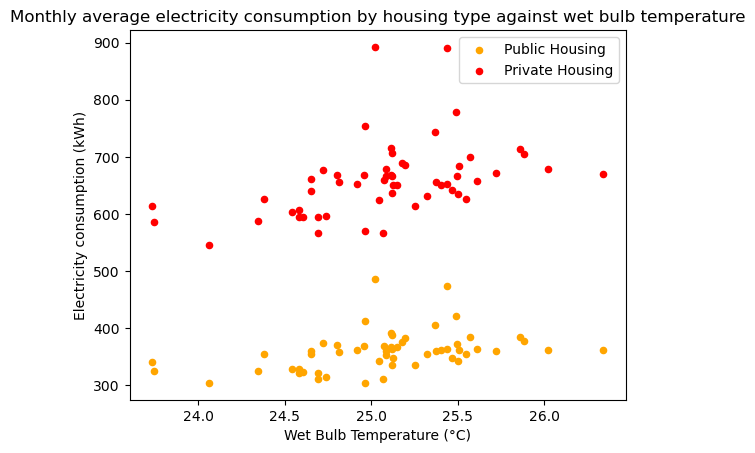

In [76]:
# Plotting electricity consumption against wet bulb temperature
plt.scatter(df_main['wet_bulb_temperature'], df_main['public_cons'], label='Public Housing', s=20, color='orange')
plt.scatter(df_main['wet_bulb_temperature'], df_main['private_cons'], label='Private Housing', s=20, color='red')

plt.xlabel('Wet Bulb Temperature (°C)')
plt.ylabel('Electricity consumption (kWh)')
plt.title('Monthly average electricity consumption by housing type against wet bulb temperature')
plt.legend()

plt.show()

In [51]:
# Calculate correlation coefficient for public housing consumption
corr_public_wbt = np.corrcoef(df_numeric['wet_bulb_temperature'], df_numeric['public_cons'])[0, 1]

# Calculate correlation coefficient for private housing consumption
corr_private_wbt = np.corrcoef(df_numeric['wet_bulb_temperature'], df_numeric['private_cons'])[0, 1]

print(f"Correlation coefficient for public housing consumption:", {corr_public_wbt})
print("Correlation coefficient for private housing consumption:", {corr_private_wbt})

Correlation coefficient for public housing consumption: {0.3958735442378172}
Correlation coefficient for private housing consumption: {0.4401154976882501}


**Interpretation**: We see a moderately positive relationship between electricity consumption in both public and private housing types against wet bulb temperature. By calculating the correlation coefficients, we can observe that a 1°C increase of average monthly wet bulb temperature results in an increase in electricity consumption of public housing by 39.59kWh and private housing by 44.01kWh

#### Plot: Wet bulb temperature and Electricity consumption over time

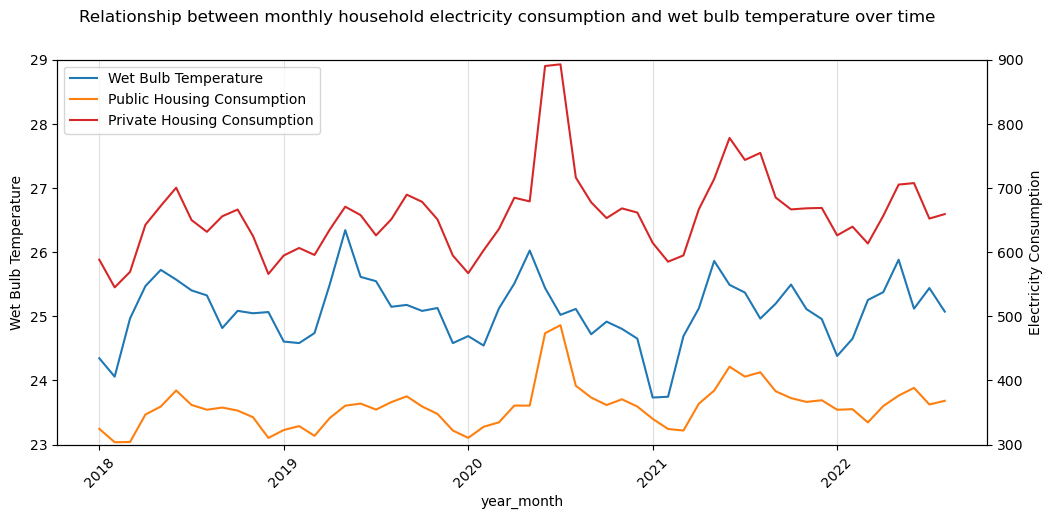

In [52]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Relationship between monthly household electricity consumption and wet bulb temperature over time')

# Plotting the first line
ax1 = sns.lineplot(x="year_month", y="wet_bulb_temperature",
                   data=df_main, label='Wet Bulb Temperature')
ax1.grid(which='both', axis='x', visible=True, alpha=0.4)

# Setting y-axis label
ax1.set_ylabel('Wet Bulb Temperature')
ax1.set_ylim(23, 29)

# Setting secondary y-axis label
ax2 = ax1.twinx()
ax2.set_ylabel('Electricity Consumption')
ax2.set_ylim(300, 900)

# Plotting the second line
sns.lineplot(x="year_month", y="public_cons",
             color='tab:orange',
             data=df_main, ax=ax2, label='Public Housing Consumption')

# Plotting the third line
sns.lineplot(x='year_month', y='private_cons',
             color='tab:red',
             data=df_main, ax=ax2, label='Private Housing Consumption')

# Setting legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Adding legends separately for each axis
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
ax2.legend().remove()

# Set x-axis tick labels for yearly interval
years = pd.to_datetime(df_main['year_month']).dt.year.unique()
ax1.set_xticks(range(0, len(df_main), 12))
ax1.set_xticklabels(years, rotation=45)

plt.show();


**Interpretation**: By plotting wet bulb temperature and electricity consumption over time, we notice that the three lines generally trend together, except for an anomaly in mid 2020s. 

### Plot: Temperature and Electricity Consumption

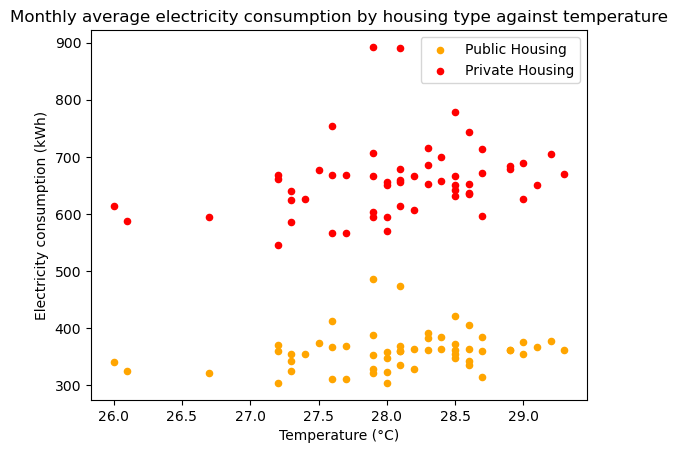

In [77]:
# Plotting electricity consumption against temperature
df_temp_sort = df_numeric.sort_values('mean_temp')
plt.scatter(df_temp_sort['mean_temp'], df_temp_sort['public_cons'], label='Public Housing', s=20, color='orange')
plt.scatter(df_temp_sort['mean_temp'], df_temp_sort['private_cons'], label='Private Housing', s=20, color='red')

plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity consumption (kWh)')
plt.title('Monthly average electricity consumption by housing type against temperature')
plt.legend()

plt.show()

In [54]:
# Calculate correlation coefficient for public housing consumption
corr_public_temp = np.corrcoef(df_numeric['mean_temp'], df_numeric['public_cons'])[0, 1]

# Calculate correlation coefficient for private housing consumption
corr_private_temp = np.corrcoef(df_numeric['mean_temp'], df_numeric['private_cons'])[0, 1]

print("Correlation coefficient for public housing consumption:", {corr_public_temp})
print("Correlation coefficient for private housing consumption:", {corr_private_temp})

Correlation coefficient for public housing consumption: {0.23891231644306696}
Correlation coefficient for private housing consumption: {0.2804994204460034}


**Interpretation**: We see a mildly positive relationship between electricity consumption in both public and private housing types against temperature. By calculating the correlation coefficients, we can observe that a 1°C increase of average monthly temperature results in an increase in electricity consumption of public housing by 23.89kWh and private housing by 28.05kWh

#### Temperature and electricity consumption over time
As the problem statement and additional research specifies to look for relationships between temperature and electricity consumption, more could be understood by looking into how electricity usage fluctuates with temperature across time.

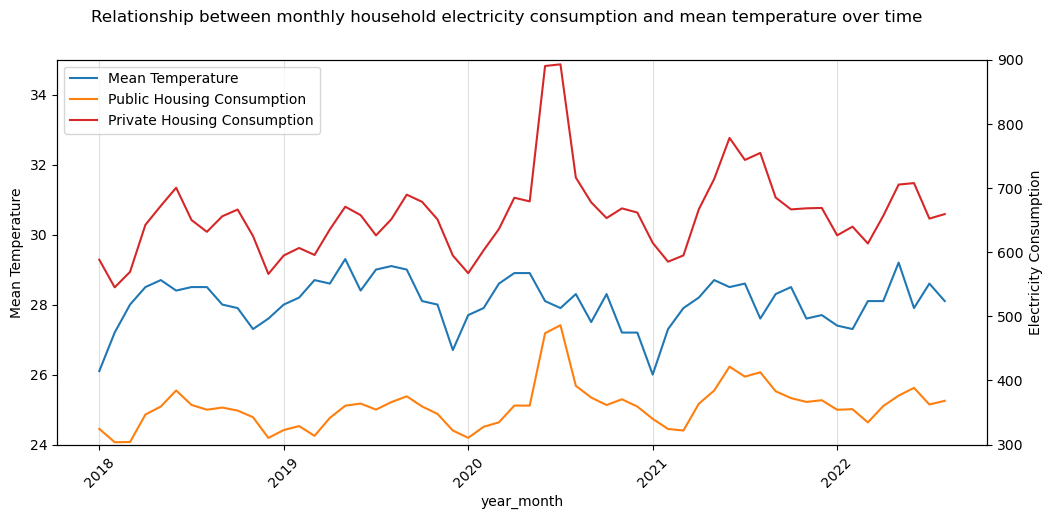

In [55]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Relationship between monthly household electricity consumption and mean temperature over time')

# Plotting the first line
ax1 = sns.lineplot(x="year_month", y="mean_temp",
                   data=df_main, label='Mean Temperature')
ax1.grid(which='both', axis='x', visible=True, alpha=0.4)

# Setting y-axis label
ax1.set_ylabel('Mean Temperature')
ax1.set_ylim(24, 35)

# Setting secondary y-axis label
ax2 = ax1.twinx()
ax2.set_ylabel('Electricity Consumption')
ax2.set_ylim(300, 900)

# Plotting the second line
sns.lineplot(x="year_month", y="public_cons",
             color='tab:orange',
             data=df_main, ax=ax2, label='Public Housing Consumption')

# Plotting the third line
sns.lineplot(x='year_month', y='private_cons',
             color='tab:red',
             data=df_main, ax=ax2, label='Private Housing Consumption')

# Setting legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Adding legends separately for each axis
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
ax2.legend().remove()

# Set x-axis tick labels for yearly interval
years = pd.to_datetime(df_main['year_month']).dt.year.unique()
ax1.set_xticks(range(0, len(df_main), 12))
ax1.set_xticklabels(years, rotation=45)

plt.show();


**Interpretation**: It is observable that electricity consumption of both private and public housing follows the trend of temperature changing, however there is a set of data in the middle months of 2020 (similar to wet bulb temperature plot) that saw a huge spike in electricity consumption despite a drop in temperature (April to September). See chart below.

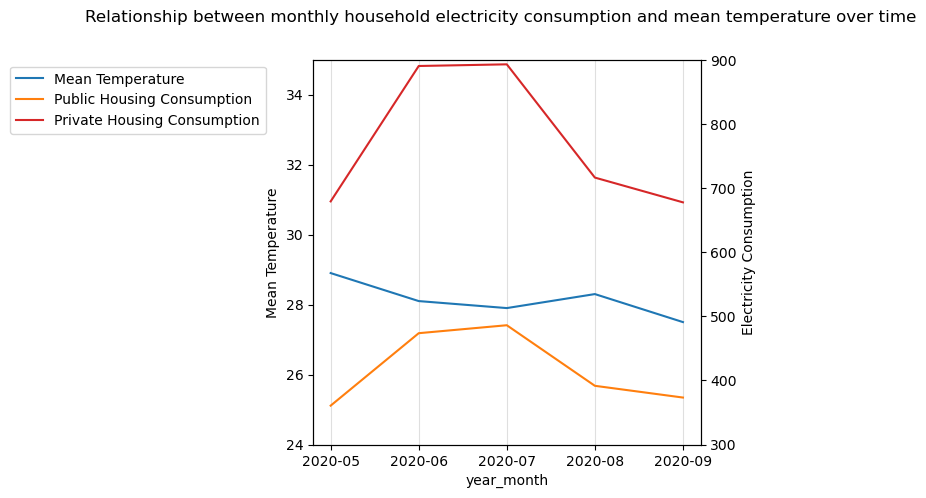

In [56]:
# Creating a dataframe zooming in on 2020 april to september
df_apr_sep_2020 = df_main[(df_main['year_month'] >= '2020-04-01') & (df_main['year_month'] <= '2020-09-01')]

fig = plt.figure(figsize=(5, 5))
fig.suptitle('Relationship between monthly household electricity consumption and mean temperature over time')

# Plotting the first line
ax1 = sns.lineplot(x="year_month", y="mean_temp",
                   data=df_apr_sep_2020, label='Mean Temperature')
ax1.grid(which='both', axis='x', visible=True, alpha=0.4)

# Setting y-axis label
ax1.set_ylabel('Mean Temperature')
ax1.set_ylim(24, 35)

# Setting secondary y-axis label
ax2 = ax1.twinx()
ax2.set_ylabel('Electricity Consumption')
ax2.set_ylim(300, 900)

# Plotting the second line
sns.lineplot(x="year_month", y="public_cons",
             color='tab:orange',
             data=df_apr_sep_2020, ax=ax2, label='Public Housing Consumption')

# Plotting the third line
sns.lineplot(x='year_month', y='private_cons',
             color='tab:red',
             data=df_apr_sep_2020, ax=ax2, label='Private Housing Consumption')

# Setting legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Adding legends separately for each axis
ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(-0.8, 1))
ax2.legend().remove()

plt.show();


After doing some quick research on Singapore during this time period, I was reminded that lockdown measures took place during this time period (specifically 7 April-1 June 2020, 16 May-13 June 2021 and 22 July-9 August 2021) [(Straits Times, 2022)](https://www.straitstimes.com/singapore/two-years-of-twists-and-turns-a-timeline-of-singapores-covid-19-measures). This explains the increase in electricity consumption across all households with a momentary decrease in temperatures as most economic activities came to a standstill and had a considerable impact on CO2 emissions [(UN, 2022)](https://www.un.org/en/desa/no-pandemic-did-not-help-climate-action), while people were kept at home most of the time, leading to a spike in household electricity consumption.

### Plot: Number of rainy days and Electricity Consumption

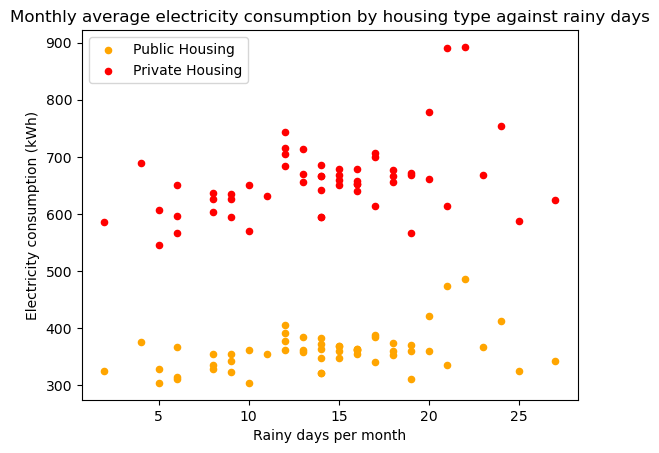

In [78]:
# Plotting electricity consumption against rainy days
plt.scatter(df_numeric['no_of_rainy_days'], df_numeric['public_cons'], label='Public Housing', s=20, color='orange')
plt.scatter(df_numeric['no_of_rainy_days'], df_numeric['private_cons'], label='Private Housing', s=20, color='red')

plt.xlabel('Rainy days per month')
plt.ylabel('Electricity consumption (kWh)')
plt.title('Monthly average electricity consumption by housing type against rainy days')
plt.legend()

plt.show()

In [58]:
# Calculate correlation coefficient for public housing consumption
corr_public = np.corrcoef(df_numeric['no_of_rainy_days'], df_numeric['public_cons'])[0, 1]

# Calculate correlation coefficient for private housing consumption
corr_private = np.corrcoef(df_numeric['no_of_rainy_days'], df_numeric['private_cons'])[0, 1]

print("Correlation coefficient for public housing consumption:", corr_public)
print("Correlation coefficient for private housing consumption:", corr_private)

Correlation coefficient for public housing consumption: 0.40834779571542207
Correlation coefficient for private housing consumption: 0.40869065277610067


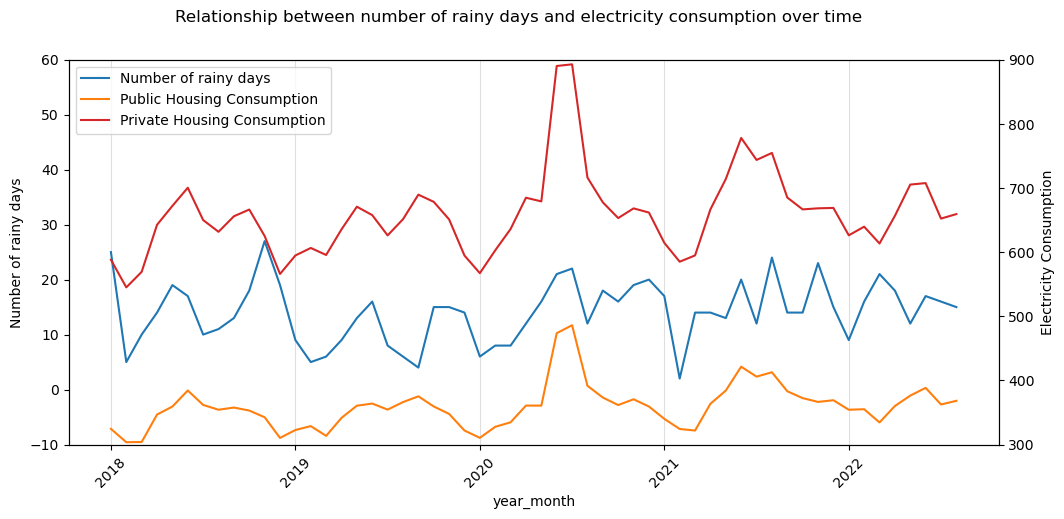

In [59]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Relationship between number of rainy days and electricity consumption over time')

# Plotting the first line
ax1 = sns.lineplot(x="year_month", y="no_of_rainy_days",
                   data=df_main, label='Number of rainy days')
ax1.grid(which='both', axis='x', visible=True, alpha=0.4)

# Setting y-axis label
ax1.set_ylabel('Number of rainy days')
ax1.set_ylim(-10, 60)

# Setting secondary y-axis label
ax2 = ax1.twinx()
ax2.set_ylabel('Electricity Consumption')
ax2.set_ylim(300, 900)

# Plotting the second line
sns.lineplot(x="year_month", y="public_cons",
             color='tab:orange',
             data=df_main, ax=ax2, label='Public Housing Consumption')

# Plotting the third line
sns.lineplot(x='year_month', y='private_cons',
             color='tab:red',
             data=df_main, ax=ax2, label='Private Housing Consumption')

# Setting legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Adding legends separately for each axis
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
ax2.legend().remove()

# Set x-axis tick labels for yearly interval
years = pd.to_datetime(df_main['year_month']).dt.year.unique()
ax1.set_xticks(range(0, len(df_main), 12))
ax1.set_xticklabels(years, rotation=45)

plt.show();

**Interpretation**: It is interesting to note that as the number of rainy days increase, there is a mildly positive correlation with electricity consumption. Intuitively, I had imagined this as a U-shaped curve as the lack of rain days could also suggest dry spells which leads to people staying indoors and using more electricity to cool their houses. We can hypothesise that as rainy days per month increase, people may stay indoors more and result in higher electricity consumption.

The line plot over time also shows that the relationship between number of rainy days and electricity consumption has more time intervals where they did not trend together, despite having a stronger correlation than temperature.

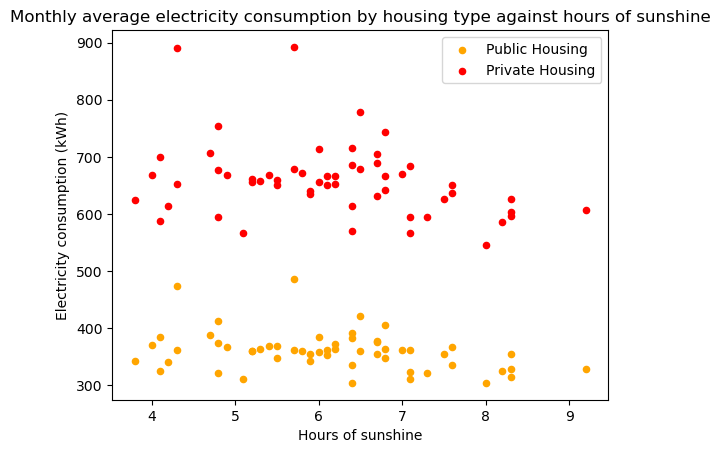

In [79]:
#Plotting electricity consumption against sunshine hours
plt.scatter(df_numeric['mean_sunshine_hrs'], df_numeric['public_cons'], label='Public Housing', s=20, color='orange')
plt.scatter(df_numeric['mean_sunshine_hrs'], df_numeric['private_cons'], label='Private Housing', s=20, color='red')

plt.xlabel('Hours of sunshine')
plt.ylabel('Electricity consumption (kWh)')
plt.title('Monthly average electricity consumption by housing type against hours of sunshine')
plt.legend()

plt.show()

In [61]:
# Calculate correlation coefficient for public housing consumption
corr_public_sunshine = np.corrcoef(df_numeric['mean_sunshine_hrs'], df_numeric['public_cons'])[0, 1]

# Calculate correlation coefficient for private housing consumption
corr_private_sunshine = np.corrcoef(df_numeric['mean_sunshine_hrs'], df_numeric['private_cons'])[0, 1]

print("Correlation coefficient for public housing consumption:", corr_public_sunshine)
print("Correlation coefficient for private housing consumption:", corr_private_sunshine)

Correlation coefficient for public housing consumption: -0.3245752255425666
Correlation coefficient for private housing consumption: -0.3050503711783288


Interpretation: There is a mildly negative correlation between sunshine hours per day against electricity consumption. By calculating the correlation coefficients, we can derive that an hour decrease in sunshine leads to a 32.46kWh and 30.5kWh increase in electricity usage across public and private housing respectively. This is also slightly unexpected as my initial hypothesis was a positive correlation. 

### A combination of factors

Each factor cannot independently predict electricity consumption alone. I've decided to look into the strongest correlations - wet bulb temperature and number of rain days, to identify if there are months in which a high wet bulb temperature and number of rain days happened in this range of analysis.

/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_7599/2776920501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_usage.sort_values('month', inplace=True)


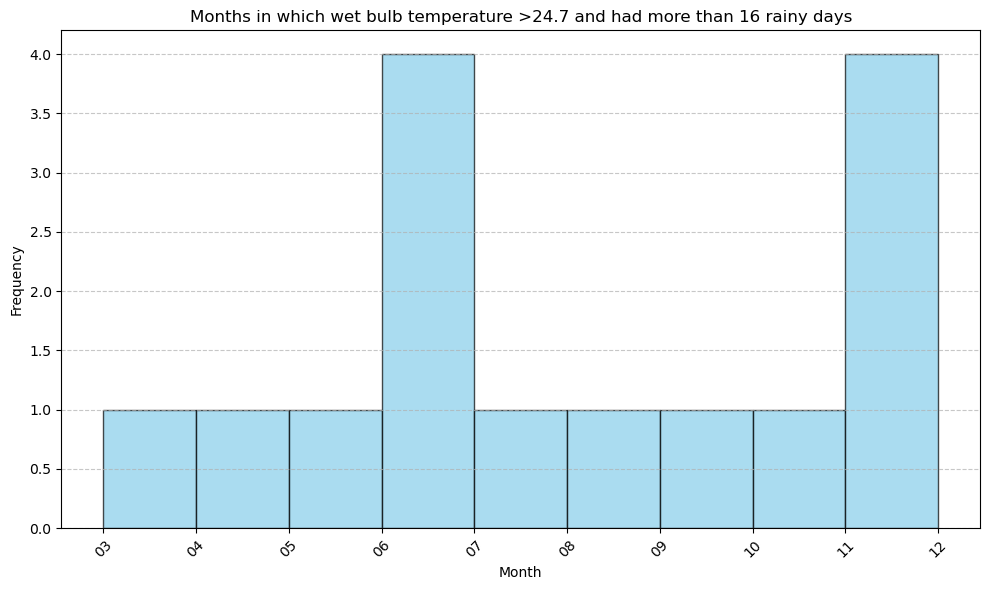

In [62]:
high_usage = df_agg[(df_agg['wet_bulb_temperature']>24.7) & (df_agg['no_of_rainy_days']>16)]
high_usage.sort_values('month', inplace=True)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(high_usage['month'], bins=9, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Months in which wet bulb temperature >24.7 and had more than 16 rainy days')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

## Conclusions and Recommendations

##### Conclusions
Based on the analysis of 2018 January to 2022 August, we have observed that:
1. Wet bulb temperature and number of rainy days have the strongest correlations with Electricity consumption. A 1°C increase in wet bulb temperature correlates to an increase in electricity consumption of public housing by 39.59kWh and private housing by 44.01kWh, while an extra day of rain correlates with a 40.8kWh increase in electricity consumption across dwelling types. 
2. Household electricity consumption has mildly positive correlations with temperature. An increase in temperature by 1°C correlates to an increase in electricity consumption of public housing by 23.89kWh and private housing by 28.05kWh.
3. There are anomalous situations that has to be taken into account, such as during the COVID pandemic, temperatures dropped slightly however household electricity consumption spiked drastically. 
4. June and November are months that are very likely to experience more number of rainy days and higher wet bulb temperatures, based on the moderately positive correlations of both variables to electricity consumption, these are months EMA needs to pay attention to in terms of electricity demand planning.

Due to the moderately positive correlation between wet bulb temperature and electricity consumption, and a mild positive correlation between temperature and electricity consumption, we can posit that electricity consumption will continue to increase as global temperatures increase. It is important that EMA takes temperature and rainfall into account when planning for electricity supply. This has to be caveated that correlation does not imply causation, more studies need to be done to identify other factors that were not included in this analysis that possibly affects electricity consumption. 

In addition, there may be instances where a spike in electricity consumption cannot be planned for, such as when a global pandemic event occurs and people are forced to stay indoors to control the spread of virus.

Lastly, June and November are months to look out for where domestic electricity consumption may be higher due to increased wet bulb temperatures and number of rainy days.

##### Recommendations
Global temperatures are expected to increase by 0.4°C by 2030 [(New York Times, 2023)](https://www.nytimes.com/2023/03/20/climate/global-warming-ipcc-earth.html) while Singapore's population is expected to be between 6.5-6.9M in the same year[(Straits Times, 2024)](https://www.straitstimes.com/singapore/singapores-population-could-hit-69m-by-2030), a 26.6% increase from the current population of 5.45M. 

Assuming dwelling units increase proportionately to population, and taking into account the correlation coefficient between temperature and electricity consumption, the demand for electricity is expected to increase by **27.1% for private housing and 27.3% for public housing**. 

In addition, as burning of fuels for energy generation play a large role in global warming, we also have to ensure that we rely on cleaner forms of energy to meet the increased demand, such that we do not create a vicious cycle electricity consumption that leads to higher temperatures. 

I would also recommend to test the hypotheses on temperature and rainy days against electricity consumption. If the null hypothesis can be rejected with a 95% confidence level, we can use this data to build more accurate predictive models for housing electricity consumption planning.

In [80]:
# Calculations to derive percentage increase in housing electricity demand

# Private housing (Assuming population increase rate = public and private housing units increase rate)
housing_units_increase = (6.9-5.45)/5.45
priv_housing_temp_increase = corr_private_temp*100*0.4
priv_housing_temp_increase_pct = priv_housing_temp_increase/df_agg['private_cons'].mean()
priv_housing_elec_demand_pct = (1+priv_housing_temp_increase_pct)*housing_units_increase
print(priv_housing_elec_demand_pct)

# Public housing
pub_housing_temp_increase = corr_public_temp*100*0.4
pub_housing_temp_increase_pct = pub_housing_temp_increase/df_agg['public_cons'].mean()
pub_housing_elec_demand_pct = (1+pub_housing_temp_increase_pct)*housing_units_increase
print(pub_housing_elec_demand_pct)


0.27058659156125364
0.273126954182821


Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!